<a href="https://colab.research.google.com/github/pushyag1/NLPClass/blob/master/Accuracy%20of%20classifier%20model%20with%20Keras_and_sentimentAnalysis%20for%20airline%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1. Accuracy of classifier model with Keras

1. Import the 'one_hot', 'pad_sequences', 'Sequential', 'Dense, Flatten',
'Embedding', and 'pandas' libraries.
2. Define the corpus with the following sentences: This is good pizza, I
love Italian pizza, The best pizza, nice pizza, Excellent pizza, I love
pizza, The pizza was alright, disgusting pineapple pizza, not good
pizza, bad pizza, very bad pizza, I had better pizza.
3. Create class labels for each sentence '1' for positive and '0' for
negative.
4. Create a data frame with 'text' as corpus and 'sentiment' as labels.
5. Extract the vocabulary from the corpus and encode it.
6. Pad the document to the maximum length of the longest sentences to
have uniform length.
7. Define the model with Keras with Embedding (None, 5.8) as output
shape, Flatten (None, 40), and Dense (None, 1).
8. Use epochs = 50, optimizer ='adam', loss='binary_crossentropy', and
metrics=['acc'].
9. What are your conclusions about the model?

In [3]:
from numpy import array
from keras_preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import pandas as pd


In [8]:
#defining corpus
corpus=['This is good pizza', 
        'I love Italian pizza', 
        'The best pizza',
        'nice pizza',
        'Excellent pizza',
        'I love pizza',
        'The pizza was alright',
        'disgusting pineapple pizza',
        'not good pizza',
        'bad pizza',
        'very bad pizza',
        'I had better pizza']

In [9]:
#creating labels fro corpus
labels = array([1,1,1,1,1,1,0,0,0,0,0,0])

In [10]:
output_dim=8

In [11]:
pd.DataFrame({'text':corpus,'sentiment':labels})

,text,sentiment
0,This is good pizza,1
1,I love Italian pizza,1
2,The best pizza,1
3,nice pizza,1
4,Excellent pizza,1
5,I love pizza,1
6,The pizza was alright,0
7,disgusting pineapple pizza,0
8,not good pizza,0
9,bad pizza,0


In [13]:
#extract the vocabulary from the corpus
sentences = [voc.split() for voc in corpus]
vocabulary=set([word for sentence in sentences for word in sentence])

In [35]:
vocabulary

{'Excellent',
 'I',
 'Italian',
 'The',
 'This',
 'alright',
 'bad',
 'best',
 'better',
 'disgusting',
 'good',
 'had',
 'is',
 'love',
 'nice',
 'not',
 'pineapple',
 'pizza',
 'very',
 'was'}

In [14]:
vocab_size = len(vocabulary)
encoded_corpus = [one_hot(d,vocab_size) for d in corpus ]
encoded_corpus

[[13, 2, 10, 12],
 [13, 18, 15, 12],
 [10, 12, 12],
 [6, 12],
 [17, 12],
 [13, 18, 12],
 [10, 12, 16, 2],
 [6, 10, 12],
 [4, 10, 12],
 [17, 12],
 [2, 17, 12],
 [13, 2, 16, 12]]

In [15]:
#pad the documents to the max length of the longest sentences
max_length = 5
padded_docs = pad_sequences(encoded_corpus,maxlen=max_length,padding='post')
print(padded_docs)

[[13  2 10 12  0]
 [13 18 15 12  0]
 [10 12 12  0  0]
 [ 6 12  0  0  0]
 [17 12  0  0  0]
 [13 18 12  0  0]
 [10 12 16  2  0]
 [ 6 10 12  0  0]
 [ 4 10 12  0  0]
 [17 12  0  0  0]
 [ 2 17 12  0  0]
 [13  2 16 12  0]]


In [16]:
#model definition
model = Sequential()
model.add(Embedding(vocab_size,output_dim,input_length=max_length,name='embedding'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
#compile the model
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['acc'])
#summarize the model
print(model.summary())
#fit the model
model.fit(padded_docs,labels,epochs=50,verbose=0)

#evaluate the model
loss, accuracy = model.evaluate(padded_docs,labels,verbose=0)
print('Accuracy: %f' %(accuracy * 100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5, 8)              160       
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 75.000000


## Exercise 2.
1. Load nltk, pandas, re, numpy, and matplotlb.
2. Use data_source_url =
"https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-USAirline-
Sentiment-/master/Tweets.csv"
3. Take a look at the first five rows.
4. Plot the shares of airlines mentioned in the data.
5. Plot the percentage of positive, negative, and neutral sentiments.
6. In a bar chart, show the number of positive, negative, and neutral
comments by airline.
7. Using Seaborn, show airlines' sentiment confidence.
8. Define the features and labels.
9. Clean the tweets.
10. Vectorize the tweets.
11. Create a train and test (20%) dataset.
12. Import the RandomClassifier model.
13. Define the 'predictions'.
14. Generate the confusion matrix, the classification report, and the
accuracy score.
15. What is your conclusion?

In [17]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)

In [19]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [20]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


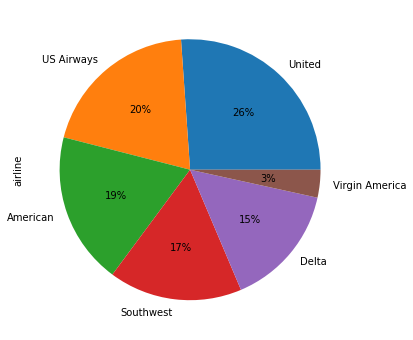

In [21]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

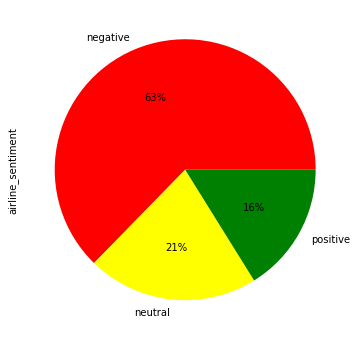

In [22]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

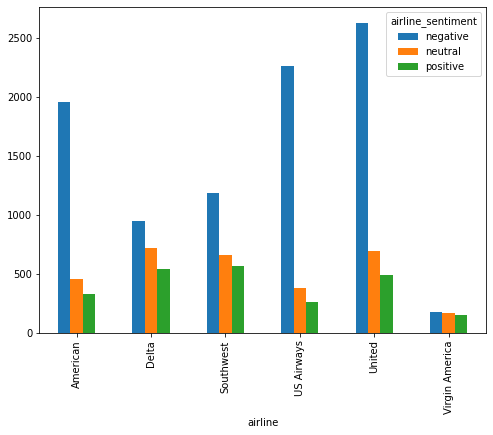

In [23]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

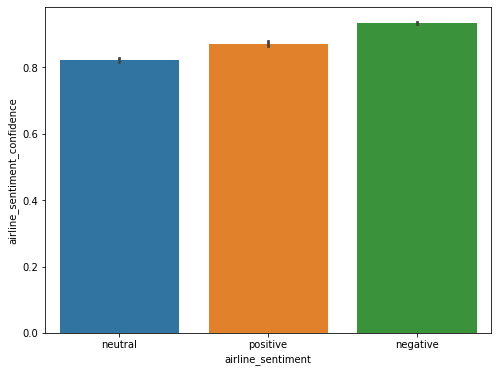

In [24]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

In [25]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [26]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [32]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
predictions = text_classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


In [ ]:
#we have achieved an accuracy of 75%